# Rede Multi Layer Perceptron (MLP)

In [1]:
import numpy as np
import pandas as pd

Definição dos dados

In [2]:
df = pd.DataFrame(data=np.array([[2, 1.5, 1], [1.66, 1.56, 0], 
                                 [1.3, 1.9, 0], [0.3, 2.1, 0],
                                 [2.3, 0.9, 1], [0.3, 3.1, 0],
                                 [1.7, 0.9, 1], [1.8, 0.3, 1],
                                 [2.5, 1.3, 1], [1.8, 2.1, 0]]), 
                                  index= np.linspace(1,10,10), 
                                  columns=['in1', 'in2', 'out'])
df

,in1,in2,out
1.0,2.00,1.50,1.0
2.0,1.66,1.56,0.0
3.0,1.30,1.90,0.0
4.0,0.30,2.10,0.0
5.0,2.30,0.90,1.0
6.0,0.30,3.10,0.0
7.0,1.70,0.90,1.0
8.0,1.80,0.30,1.0
9.0,2.50,1.30,1.0
10.0,1.80,2.10,0.0


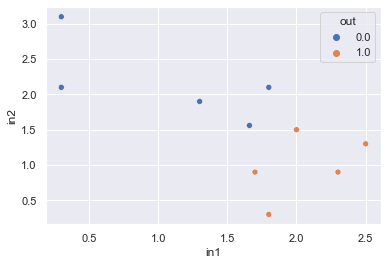

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.scatterplot(x='in1', y='in2', hue='out', data=df) 
plt.show()

Criação da classe mlp

In [4]:
class mlp(): 
    def __init__(self,learning_rate):
        np.random.seed(0) 
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate 
            
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    def _tangent(self,x):
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) 
                
    def _tangent_deriv(self,x):
        return 1 - (_tangent(x))**2
    
    def _predict(self,input_vector,f_ativacao): 
        #def _predict(input_vector, weights, bias, f_ativacao):
        self.layer_1 = np.dot(input_vector, self.weights) + self.bias    
        
        if f_ativacao == 'sigmoide' or  f_ativacao == '':
            self.layer_2 = self._sigmoid(self.layer_1)
        
        else:
            self.layer_2 = self._tangent(self.layer_1)
        
        self.prediction =self.layer_2
         
        return self.prediction
    
    def _erro(self,target):
        self.error = (1/2)*(target - self.prediction) ** 2    
        return self.error

    def _compute_gradients(self,input_vector, target, f_ativacao): 
        if f_ativacao == 'sigmoide' or  f_ativacao == '':
            dprediction_dlayer1 = self._sigmoid_deriv(self.layer_1)
        else:
            dprediction_dlayer1 = mlp._tangent_deriv(self.layer_1)
            
        derror_dprediction = self.prediction - target        
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)
        self.derror_dweights = derror_dprediction*dprediction_dlayer1*dlayer1_dweights
        self.derror_dbias = derror_dprediction*dprediction_dlayer1*dlayer1_dbias        
        return self.derror_dweights, self.derror_dbias
    
    def _update_parameters(self):
        self.bias = self.bias - (self.derror_dbias * self.learning_rate)        
        self.weights = self.weights - (self.derror_dweights * self.learning_rate)        
        return self.bias, self.weights 

Aprendizagem da rede usando a classe mlp

In [5]:
import pandas as pd
learning_rate = 0.01
model = mlp(learning_rate)
target = np.array(df['out'])
input_vector = np.array([df['in1'],df['in2']])
gradiente = 0
derror_dweights = 0
derror_dbias = 0
net_error_total = []
net_weights1 = []
net_weights2 = []
net_bias = []
for k in range(2000):
    gradiente = 0
    derror_dweights = 0
    derror_dbias = 0
    error_total = 0
    pred_final =[]
    for i in range(4):         
        pred =model._predict(input_vector[0:2,i],'sigmoide')
        pred_final.append(pred)        
        prediction = pred       
        error = model._erro(target[i])         
        error_total = error_total + error         
        grad = model._compute_gradients(input_vector[0:2,i], target[i], 'sigmoide')
        derror_dweights = derror_dweights + grad[0]
        derror_dbias = derror_dbias +grad[1] 
    net_error_total.append(error_total)    
    atualiza = model._update_parameters()
    bias = atualiza[0]
    weights = atualiza[1]
    net_weights1.append(weights[0])
    net_weights2.append(weights[1])
    net_bias.append(bias)

Geração de graficos

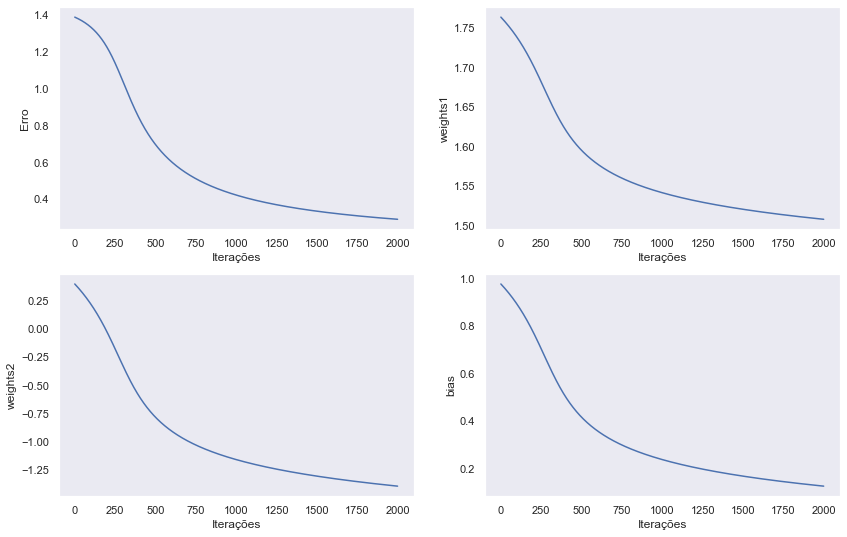

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
plt.plot(net_error_total)
plt.grid()
plt.ylabel('Erro')
plt.xlabel('Iterações')


plt.subplot(2,2,2)
plt.plot(net_weights1)
plt.ylabel('weights1')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,3)
plt.plot(net_weights2)
plt.ylabel('weights2')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(2,2,4)
plt.plot(net_bias)
plt.ylabel('bias')
plt.xlabel('Iterações')
plt.grid()

In [7]:
for i in range(10):
    pred = model._predict(input_vector[0:2,i],'sigmoide')
    print('Predito= ',pred,'Target= ',target[i])

Predito=  0.7412964735006848 Target=  1.0
Predito=  0.6121750916439331 Target=  0.0
Predito=  0.36359557012619054 Target=  0.0
Predito=  0.08736518666225855 Target=  0.0
Predito=  0.9121755340542341 Target=  1.0
Predito=  0.023236145188277754 Target=  0.0
Predito=  0.8077878643968566 Target=  1.0
Predito=  0.918480375311308 Target=  1.0
Predito=  0.8894535061753586 Target=  1.0
Predito=  0.4789480202834327 Target=  0.0


Criação da classe mlp2
<img src="files/MLP2.png" width="500" height="250">

In [15]:
class mlp2(): 
    def __init__(self,lr):
        np.random.seed(0) 
        self.weights1 = np.array([[np.random.randn(), np.random.randn()],
                               [np.random.randn(), np.random.randn()]])        
        self.bias1 = np.array([np.random.randn(), np.random.randn()])
        self.weights2 = np.array([np.random.randn(), np.random.randn()])        
        self.bias2 = np.array([np.random.randn()])
        self.learning_rate = lr
    
    #    #return weights, bias, learning_rate
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    def _tangent(self,x):
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) 
                
    def _tangent_deriv(self,x):
        return 1 - (self._tangent(x))**2
    
    def _ReLU(self,x):
        self.data = [max(0,value) for value in x]      
        return np.array(self.data, dtype=float)
    
    def _der_ReLU(self,x):
        return [1 if value>0 else 0 for value in x]
    
    def _predict(self,input_vector,f_ativacao): 
        #print('f_ativacao= ',f_ativacao[0])
        #print('input_vector dentro da função _predict= ',input_vector)
        self.layer_1 = np.dot(input_vector, self.weights1) + self.bias1   
        #print('layer_1 dentro da função _predict= ',self.layer_1)
                 
        if f_ativacao[0] == 'sigmoide' or  f_ativacao[0] == '':
            self.layer_2 = self._sigmoid(self.layer_1)                    
        elif f_ativacao[0] == 'ReLU':
            self.layer_2 = self._ReLU(self.layer_1)
        else:
            self.layer_2 = self._tangent(self.layer_1)
        
        #print('layer_2 dentro da função _predict= ',self.layer_2)    
        
        self.layer_3 = np.dot(self.layer_2, self.weights2) + self.bias2
        #print('layer_3 dentro da função _predict= ',self.layer_3)
        
        if f_ativacao[1] == 'sigmoide' or  f_ativacao == '':
            self.layer_4 = self._sigmoid(self.layer_3)
        
        elif f_ativacao[1] == 'ReLU':
            self.layer_4 = self._ReLU(self.layer_3)
        else:
            self.layer_4 = self._tangent(self.layer_3)
        
        #print('layer_4 dentro da função _predict= ',self.layer_4)
        self.prediction =self.layer_4
         
        return self.prediction
    
    def _erro(self,target):
        self.error = (1/2)*(target - self.prediction) ** 2    
        return self.error

    def _compute_gradients(self,input_vector, target, f_ativacao): 
        if f_ativacao[0] == 'sigmoide' or  f_ativacao[0] == '':
            dprediction_dlayer1 = self._sigmoid_deriv(self.layer_1)            
        elif f_ativacao[0] == 'ReLU':
            dprediction_dlayer1 = self._der_ReLU(self.layer_1)            
        else:
            dprediction_dlayer1 = self._tangent_deriv(self.layer_1)
            
            
        if f_ativacao[1] == 'sigmoide' or  f_ativacao[1] == '':            
            dprediction_dlayer3 = self._sigmoid_deriv(self.layer_3)
        elif f_ativacao[1] == 'ReLU':            
            dprediction_dlayer3 = self._der_ReLU(self.layer_3)
        else:            
            dprediction_dlayer3 = self._tangent_deriv(self.layer_3)
            
        derror_dprediction = self.prediction - target        
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights1) + (1 * input_vector)
        dlayer3_dbias = 1
        dlayer3_dweights = (0 * self.weights2) + (1 * self.layer_2)
        
        self.derror_dweights2 = derror_dprediction*dprediction_dlayer3*dlayer3_dweights
        self.derror_dbias2 = derror_dprediction*dprediction_dlayer3*dlayer3_dbias 
        
        self.derror_dweights1 = self.derror_dweights2*dprediction_dlayer1*dlayer1_dweights
        self.derror_dbias1 = self.derror_dbias2*dprediction_dlayer1*dlayer1_dbias        
                
        
        return self.derror_dweights1, self.derror_dbias1, self.derror_dweights2, self.derror_dbias2
    
    def _update_parameters(self):
        self.bias1 = self.bias1 - (self.derror_dbias1 * self.learning_rate)        
        self.weights1 = self.weights1 - (self.derror_dweights1 * self.learning_rate)  
        self.bias2 = self.bias2 - (self.derror_dbias2 * self.learning_rate)        
        self.weights2 = self.weights2 - (self.derror_dweights2 * self.learning_rate) 
        return self.bias1, self.weights1,self.bias2, self.weights2

In [9]:
input= [1,2]
target = 1
model = mlp2(0.01)
ativacao = ['ReLU','sigmoide']
print('Pesos iniciais= ',model.weights1,'Polarização inicial= ',model.bias1)
pred =model._predict(input,ativacao)
print('Predição=',pred)
grad = model._compute_gradients(input, target, ativacao)
print('Gradiente= ',grad)
update = model._update_parameters()
print(update)

Pesos iniciais=  [[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]] Polarização inicial=  [ 1.86755799 -0.97727788]
f_ativacao=  ReLU
input_vector dentro da função _predict=  [1, 2]
layer_1 dentro da função _predict=  [5.5890863  3.90466573]
layer_2 dentro da função _predict=  [5.5890863  3.90466573]
layer_3 dentro da função _predict=  [4.61590801]
layer_4 dentro da função _predict=  [0.99020372]
Predição= [0.99020372]
Gradiente=  (array([[-0.00053111, -0.0007421 ],
       [-0.00053111, -0.0007421 ]]), array([-9.50269758e-05, -9.50269758e-05]), array([-0.00053111, -0.00037105]), array([-9.50269758e-05]))
(array([ 1.86755894, -0.97727693]), array([[1.76405766, 0.40016463],
       [0.9787433 , 2.24090062]]), array([-0.1032179]), array([ 0.95009373, -0.1513535 ]))


Aprendizagem da rede usando a classe mlp2

In [22]:
import pandas as pd
learning_rate = 0.01
model = mlp2(learning_rate)
ativacao = ['ReLU', 'sigmoide']
target = np.array(df['out'])
input_vector = np.array([df['in1'],df['in2']])
gradiente = 0
derror_dweights = 0
derror_dbias = 0
net_error_total = []
net_weights11 = []
net_weights12 = []
net_weights13 = []
net_weights14 = []
net_weights21 = []
net_weights22 = []
net_bias11 = []
net_bias12 = []
net_bias21 = []
for k in range(500):
    gradiente = 0
    derror_dweights1 = 0
    derror_dbias1 = 0
    derror_dweights2 = 0
    derror_dbias2 = 0
    error_total = 0
    pred_final =[]
    for i in range(10): 
        #print('input_vector[',i,']=',input_vector[0:2,i])
        pred =model._predict(input_vector[0:2,i],ativacao)
        pred_final.append(pred)        
        prediction = pred  
        #print('prediction=', prediction, 'target=',target[i])
        error = model._erro(target[i])  
        #print('error= ',error)
        error_total = error_total + error         
        grad = model._compute_gradients(input_vector[0:2,i], target[i], ativacao)
        derror_dweights1 = derror_dweights1 + grad[0]
        derror_dbias1 = derror_dbias1 +grad[1] 
        derror_dweights2 = derror_dweights2 + grad[2]
        derror_dbias2 = derror_dbias2 +grad[3]
    net_error_total.append(error_total)
    atualiza = model._update_parameters()
    bias1 = atualiza[0]
    weights1 = atualiza[1]
    bias2 = atualiza[2]
    weights2 = atualiza[3]
    net_weights1.append(weights[0])
    net_weights2.append(weights[1])
    net_bias.append(bias)
    
    net_weights11.append(weights1[0][0])
    net_weights12.append(weights1[0][1])
    net_weights13.append(weights1[1][0])
    net_weights14.append(weights1[1][1])
    net_weights21.append(weights2[0]) 
    net_weights22.append(weights2[1])
    net_bias11.append(bias1[0])
    net_bias12.append(bias1[1])
    net_bias21.append(bias2[0])

Geração de gráficos

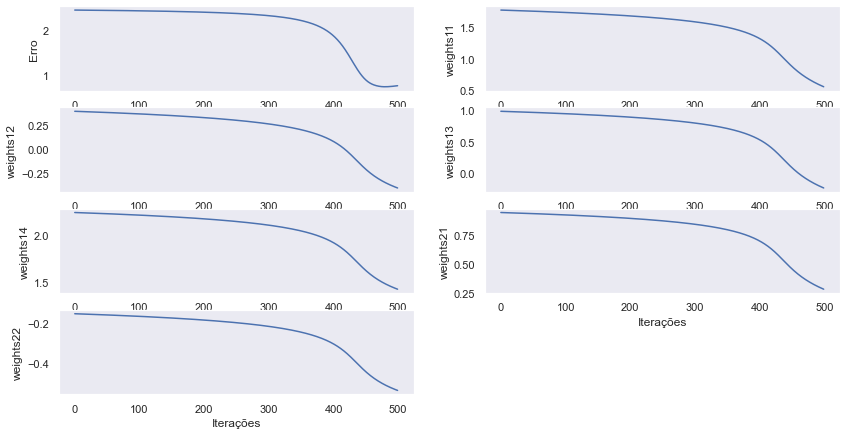

In [23]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(14, 9))

plt.subplot(5,2,1)
plt.plot(net_error_total)
plt.grid()
plt.ylabel('Erro')
plt.xlabel('Iterações')


plt.subplot(5,2,2)
plt.plot(net_weights11)
plt.ylabel('weights11')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(5,2,3)
plt.plot(net_weights12)
plt.ylabel('weights12')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(5,2,4)
plt.plot(net_weights13)
plt.ylabel('weights13')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(5,2,5)
plt.plot(net_weights14)
plt.ylabel('weights14')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(5,2,6)
plt.plot(net_weights21)
plt.ylabel('weights21')
plt.xlabel('Iterações')
plt.grid()

plt.subplot(5,2,7)
plt.plot(net_weights22)
plt.ylabel('weights22')
plt.xlabel('Iterações')
plt.grid()

In [24]:
#tivacao = ['sigmoid','ReLU']
for i in range(10):
    pred = model._predict(input_vector[0:2,i],ativacao)
    print('pred= ', pred, 'target= ', target[i])

pred=  [0.58263094] target=  1.0
pred=  [0.53873239] target=  0.0
pred=  [0.43442886] target=  0.0
pred=  [0.30833112] target=  0.0
pred=  [0.6263761] target=  1.0
pred=  [0.16238181] target=  0.0
pred=  [0.60427747] target=  1.0
pred=  [0.61708177] target=  1.0
pred=  [0.62768482] target=  1.0
pred=  [0.43990615] target=  0.0


Normalização dos dados

In [25]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_s=scaler.fit_transform(df)
dfn = pd.DataFrame(data_s, columns = ['in1','in2','out'])

In [27]:
dfn

,in1,in2,out
0,0.772727,0.428571,1.0
1,0.618182,0.450000,0.0
2,0.454545,0.571429,0.0
3,0.000000,0.642857,0.0
4,0.909091,0.214286,1.0
5,0.000000,1.000000,0.0
6,0.636364,0.214286,1.0
7,0.681818,0.000000,1.0
8,1.000000,0.357143,1.0
9,0.681818,0.642857,0.0


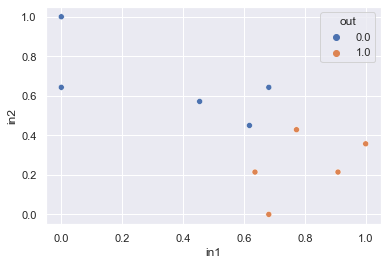

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.scatterplot(x='in1', y='in2', hue='out', data=dfn) 
plt.show()

Criação da classe mlp3

In [29]:
class mlp3(): 
    def __init__(self,lr):
        np.random.seed(0) 
        self.weights1 = np.array([[np.random.randn(), np.random.randn()],
                               [np.random.randn(), np.random.randn()]])        
        self.bias1 = np.array([np.random.randn(), np.random.randn()])
        self.weights2 = np.array([[np.random.randn(), np.random.randn()],
                               [np.random.randn(), np.random.randn()]])        
        self.bias2 = np.array([np.random.randn(), np.random.randn()])
        self.weights3 = np.array([np.random.randn(), np.random.randn()])        
        self.bias3 = np.array([np.random.randn()])
        self.learning_rate = lr
    
    #    #return weights, bias, learning_rate
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    def _tangent(self,x):
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) 
                
    def _tangent_deriv(self,x):
        return 1 - (self._tangent(x))**2
    
    def _ReLU(self,x):
        self.data = [max(0,value) for value in x]
        return np.array(self.data, dtype=float)
    
    def _der_ReLU(self,x):
        return [1 if value>0 else 0 for value in x]
    
    def _predict(self,input_vector,f_ativacao): 
        #print('f_ativacao= ',f_ativacao[0])
        #print('input_vector dentro da função _predict= ',input_vector)
        self.layer_1 = np.dot(input_vector, self.weights1) + self.bias1   
        #print('layer_1 dentro da função _predict= ',self.layer_1)
                 
        if f_ativacao[0] == 'sigmoide' or  f_ativacao[0] == '':
            self.layer_2 = self._sigmoid(self.layer_1)                    
        elif f_ativacao[0] == 'ReLU':
            self.layer_2 = self._ReLU(self.layer_1)
        else:
            self.layer_2 = self._tangent(self.layer_1)
        
        #print('layer_2 dentro da função _predict= ',self.layer_2)    
        
        self.layer_3 = np.dot(self.layer_2, self.weights2) + self.bias2
        #print('layer_3 dentro da função _predict= ',self.layer_3)
        
        if f_ativacao[1] == 'sigmoide' or  f_ativacao == '':
            self.layer_4 = self._sigmoid(self.layer_3)
        
        elif f_ativacao[1] == 'ReLU':
            self.layer_4 = self._ReLU(self.layer_3)
        else:
            self.layer_4 = self._tangent(self.layer_3)
        
        #print('layer_4 dentro da função _predict= ',self.layer_4)
        self.layer_5 = np.dot(self.layer_4, self.weights3) + self.bias3
        #print('layer_3 dentro da função _predict= ',self.layer_3)
        
        if f_ativacao[1] == 'sigmoide' or  f_ativacao == '':
            self.layer_6 = self._sigmoid(self.layer_5)
        
        elif f_ativacao[1] == 'ReLU':
            self.layer_6 = self._ReLU(self.layer_5)
        else:
            self.layer_6 = self._tangent(self.layer_5)
        
        self.prediction =self.layer_6
         
        return self.prediction
    
    def _erro(self,target):
        self.error = (1/2)*(target - self.prediction) ** 2    
        return self.error

    def _compute_gradients(self,input_vector, target, f_ativacao): 
        if f_ativacao[0] == 'sigmoide' or  f_ativacao[0] == '':
            dprediction_dlayer1 = self._sigmoid_deriv(self.layer_1)            
        elif f_ativacao[0] == 'ReLU':
            dprediction_dlayer1 = self._der_ReLU(self.layer_1)            
        else:
            dprediction_dlayer1 = self._tangent_deriv(self.layer_1)
            
            
        if f_ativacao[1] == 'sigmoide' or  f_ativacao[1] == '':            
            dprediction_dlayer3 = self._sigmoid_deriv(self.layer_3)
        elif f_ativacao[1] == 'ReLU':            
            dprediction_dlayer3 = self._der_ReLU(self.layer_3)
        else:            
            dprediction_dlayer3 = self._tangent_deriv(self.layer_3)
        
        
        if f_ativacao[2] == 'sigmoide' or  f_ativacao[2] == '':            
            dprediction_dlayer5 = self._sigmoid_deriv(self.layer_5)
        elif f_ativacao[1] == 'ReLU':            
            dprediction_dlayer5 = self._der_ReLU(self.layer_5)
        else:            
            dprediction_dlayer5 = self._tangent_deriv(self.layer_5)
        
        derror_dprediction = self.prediction - target        
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights1) + (1 * input_vector)
        dlayer3_dbias = 1
        dlayer3_dweights = (0 * self.weights2) + (1 * self.layer_2)
        dlayer5_dbias = 1
        dlayer5_dweights = (0 * self.weights3) + (1 * self.layer_3)
        
        self.derror_dweights3 = derror_dprediction*dprediction_dlayer5*dlayer5_dweights
        self.derror_dbias3 = derror_dprediction*dprediction_dlayer5*dlayer5_dbias
        
        self.derror_dweights2 = derror_dprediction*dprediction_dlayer3*dlayer3_dweights
        self.derror_dbias2 = derror_dprediction*dprediction_dlayer3*dlayer3_dbias 
        
        self.derror_dweights1 = self.derror_dweights2*dprediction_dlayer1*dlayer1_dweights
        self.derror_dbias1 = self.derror_dbias2*dprediction_dlayer1*dlayer1_dbias        
                
        
        return self.derror_dweights1, self.derror_dbias1, self.derror_dweights2, self.derror_dbias2,self.derror_dweights3, self.derror_dbias3
    def _update_parameters(self):
        self.bias1 = self.bias1 - (self.derror_dbias1 * self.learning_rate)        
        self.weights1 = self.weights1 - (self.derror_dweights1 * self.learning_rate)  
        self.bias2 = self.bias2 - (self.derror_dbias2 * self.learning_rate)        
        self.weights2 = self.weights2 - (self.derror_dweights2 * self.learning_rate) 
        self.bias3 = self.bias3 - (self.derror_dbias3 * self.learning_rate)        
        self.weights3 = self.weights3 - (self.derror_dweights3 * self.learning_rate) 
        return self.bias1, self.weights1,self.bias2, self.weights2,self.bias3, self.weights3

In [59]:
import pandas as pd
learning_rate = 0.001
model = mlp3(learning_rate)
ativacao = ['ReLU', 'ReLU', 'sigmoide']
target = np.array(df['out'])
input_vector = np.array([dfn['in1'],dfn['in2']])
gradiente = 0
derror_dweights1 = []
derror_dbias1 = []
derror_dweights2 = []
derror_dbias2 = []
derror_dweights3 = []
derror_dbias3 = []
net_error_total = []
net_weights11 = []
net_weights12 = []
net_weights13 = []
net_weights14 = []
net_weights21 = []
net_weights22 = []
net_weights23 = []
net_weights24 = []
net_weights31 = []
net_weights32 = []
net_bias11 = []
net_bias12 = []
net_bias21 = []
net_bias22 = []
net_bias31 = []
for k in range(200):
    gradiente = 0
    derror_dweights1 = 0
    derror_dbias1 = 0
    derror_dweights2 = 0
    derror_dbias2 = 0
    derror_dweights3 = 0
    derror_dbias3 = 0
    error_total = 0
    pred_final =[]
    for i in range(10): 
        #print('input_vector[',i,']=',input_vector[0:2,i])
        pred =model._predict(input_vector[0:2,i],ativacao)
        pred_final.append(pred)        
        prediction = pred  
        #print('prediction=', prediction, 'target=',target[i])
        error = model._erro(target[i])  
        #print('error= ',error)
        error_total = error_total + error         
        grad = model._compute_gradients(input_vector[0:2,i], target[i], ativacao)
        derror_dweights1 = derror_dweights1 + grad[0]
        derror_dbias1 = derror_dbias1 +grad[1] 
        derror_dweights2 = derror_dweights2 + grad[2]
        derror_dbias2 = derror_dbias2 +grad[3]
        #print('derror_dweights3= ',derror_dweights3)
        derror_dweights3 = derror_dweights3 + grad[4]
        derror_dbias3 = derror_dbias3 +grad[5]
    net_error_total.append(error_total)
    atualiza = model._update_parameters()
    bias1 = atualiza[0]
    weights1 = atualiza[1]
    bias2 = atualiza[2]
    weights2 = atualiza[3]
    bias3 = atualiza[4]
    weights3 = atualiza[5]
    net_weights1.append(weights[0])
    net_weights2.append(weights[1])
    net_bias.append(bias)
    
    net_weights11.append(weights1[0][0])
    net_weights12.append(weights1[0][1])
    net_weights13.append(weights1[1][0])
    net_weights14.append(weights1[1][1])
    net_weights21.append(weights1[0][0])
    net_weights22.append(weights1[0][1])
    net_weights23.append(weights1[1][0])
    net_weights24.append(weights1[1][1])
    net_weights31.append(weights2[0]) 
    net_weights32.append(weights2[1])
    net_bias11.append(bias1[0])
    net_bias12.append(bias1[1])
    net_bias21.append(bias2[0])
    net_bias22.append(bias2[1])
    net_bias31.append(bias3[0])

Text(0.5, 0, 'Iterações')

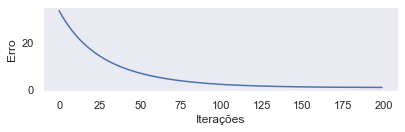

In [60]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(14, 9))

plt.subplot(5,2,1)
plt.plot(net_error_total)
plt.grid()
plt.ylabel('Erro')
plt.xlabel('Iterações')

In [61]:
#tivacao = ['sigmoid','ReLU']
for i in range(10):
    pred = model._predict(input_vector[0:2,i],ativacao)
    print('pred= ', pred, 'target= ', target[i])

pred=  [0.69087443] target=  1.0
pred=  [0.67523779] target=  0.0
pred=  [0.5708732] target=  0.0
pred=  [0.51792828] target=  0.0
pred=  [0.69721224] target=  1.0
pred=  [0.49326809] target=  0.0
pred=  [0.66817445] target=  1.0
pred=  [0.66483299] target=  1.0
pred=  [0.71234557] target=  1.0
pred=  [0.45961522] target=  0.0
